In [15]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("/Users/Dylan/Desktop/MY-DAC-Curriculum/DAC internal project/dataset/Students_Performance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [5]:
# Preprocessing: Encode the 'test preparation course' variable (assuming it's a categorical column)
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

In [6]:
# Features (X) and target (y)
X = df[['test preparation course']]  # Feature: test prep course (0 or 1)
y = df['average score']  # Target: average score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model: RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 14.53
R²: 0.01


In [17]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(df, drop_first=True)

RMSE: 15.19
R²: -0.02

Feature Importance:
                                          Feature  Importance
2                                     gender_male    0.146988
0                         test preparation course    0.138499
8         parental level of education_high school    0.078831
3                          race/ethnicity_group B    0.076352
4                          race/ethnicity_group C    0.071013
11   parental level of education_some high school    0.067256
7   parental level of education_bachelor's degree    0.065024
5                          race/ethnicity_group D    0.064971
1                                  lunch_standard    0.064694
6                          race/ethnicity_group E    0.063432
12                                 lunch_standard    0.061873
10       parental level of education_some college    0.058666
9     parental level of education_master's degree    0.042403


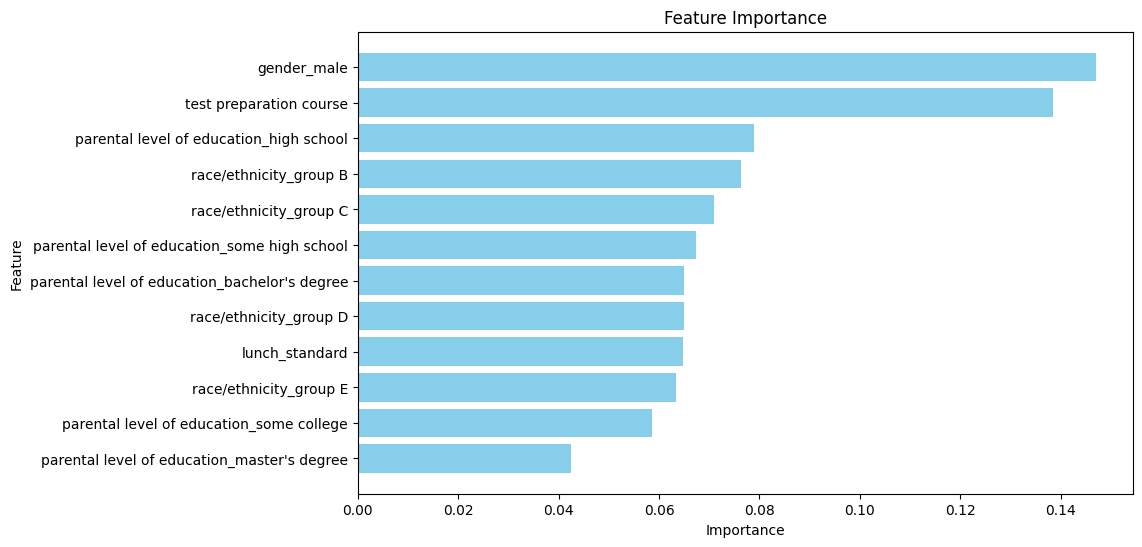

In [28]:
# Define features (X) and target variable (y)
X = data_encoded.drop(columns=['math score', 'reading score', 'writing score', 'average score'])  # Features
y = df['reading score']  # Replace with 'average_score' or another score as needed

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Make predictions
y_pred = rf_model.predict(X_test)

# 7. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 8. Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Optional: Visualize feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# Drop columns related to individual test scores (reading, writing, math)
data = df.drop(['math score', 'reading score', 'writing score'], axis=1)

# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features and target
X = data_encoded.drop('average score', axis=1)  # Features
y = data_encoded['average score']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])

# Sort feature importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Print the feature importances
print("Feature Importance:\n", feature_importance)


Feature Importance:
                                                     importance
test preparation course                               0.152083
gender_male                                           0.107768
lunch_standard                                        0.094300
lunch_standard                                        0.081527
race/ethnicity_group B                                0.071635
race/ethnicity_group C                                0.067220
race/ethnicity_group E                                0.063862
race/ethnicity_group D                                0.059927
parental level of education_high school               0.037689
parental level of education_bachelor's degree         0.030976
parental level of education_some high school          0.029526
parental level of education_some college              0.024458
parental_education_lunch_interaction_associate'...    0.023865
parental_education_lunch_interaction_high schoo...    0.019558
parental_education_lunch_interacti